## Test

In [1]:
from src.linear_causality import LinearLKInformationFlow
import numpy as np
from tqdm import tqdm
# from causality_subspace import causality_subspace

dt=1
pn=1
T1=[];T2=[]
# pca = PCA(n_components=5)  # 假设我们想将数据降到2维  
Nt=100000
np.random.seed = 5
# for i in tqdm(range(100)):
X1=np.random.randn(5,Nt)*0.2
X2=np.random.randn(5,Nt)*0.2

A1=np.array([[0.9,0.6,0,0.6,0],[0,0.8,0.6,0,0.6],[0,0,0.9,0,0],[0,0,0,0.2,0],[0,0,0,0,0.2]]).T
A2=np.array([[0.2,0.6,0,0.6,0],[0,0.2,0.6,0,0.6],[0,0,0.2,0,0],[0,0,0,0.2,0],[0,0,0,0,0.2]]).T

B1=-np.array([[0,0,0,0,0],[0,0.,0,0,0],[0,0,0,0.9,0.],[0,0,0,0.,0],[0,0,0,0,0]])
B2=-np.array([[0,0,0,0,0],[0,0.0,0,0,0],[0,0,0,0,0],[0,0,0,0.4,0],[0,0,0,0,0]])
for it in range(1,Nt):
    X1[:,it]=A1@X1[:,it-1]+X1[:,it]+1*B1@X2[:,it-1] 
    X2[:,it]=A2@X2[:,it-1]+X2[:,it]+1*B2@X1[:,it-1] 
    
XX=np.zeros([10,Nt])
XX[:5]=X1
XX[5:]=X2

In [2]:
segments = [(2,3),(8,9)]
segments = [(0, 5),(5,10)]

In [3]:
lkif = LinearLKInformationFlow(np,1)
lkif.causality_estimate(XX[:,-15000:].T, lag_list=[1], segments=segments)

In [4]:
result_dict = lkif.get_dict()

In [5]:
np.abs(result_dict["information_flow"]) > result_dict["information_flow_std_origin"]*2.56

array([[ True, False],
       [ True,  True]])

In [6]:
np.abs(result_dict["information_flow"]) > result_dict["statistics"]["p99_critical_value"]

array([[ True, False],
       [ True,  True]])

In [7]:
np.abs(result_dict["information_flow"])

array([[1.99730619e+00, 2.54949389e-03],
       [2.43552494e-01, 4.01924686e+00]])

In [8]:
result_dict["information_flow_std_origin"]

array([[0.01250821, 0.00108012],
       [0.00348534, 0.01589917]])

In [9]:
result_dict["information_flow_std"]

array([[0.01250821, 0.00122235],
       [0.00519045, 0.01589917]])

---
---

## Prof. Liang's case
+ There is no information flow between X and Y in fact.
+ The original significance test, using a 90% confidence interval, will show a limited information flow.
+ The modified method, on the other hand, will correctly accept the null hypothesis ($H_0$).

In [10]:
## load data/X.dat and Y.dat
import pandas as pd
data_X = pd.read_csv('data/X.dat', header=None)
data_Y = pd.read_csv('data/Y.dat', header=None)

In [11]:
data_X = data_X.to_numpy()
data_Y = data_Y.to_numpy()

In [12]:
data = np.concatenate((data_X, data_Y), axis=1)

In [13]:
segments = [(0,1),(1,2)]

In [14]:
lkif = LinearLKInformationFlow(np,1)
lkif.causality_estimate(data, lag_list=[1], segments=segments)

In [15]:
result_dict = lkif.get_dict()

In [16]:
print('## 是否存在因果关系 (False 代表无信息流)\n')
print("### 使用原本的方差检验方法")
print("```")
print(np.abs(result_dict["information_flow"]) > result_dict["information_flow_std_origin"] * 1.65)
print("```")

print("### 使用新的方差检验方法")
print("```")
print(np.abs(result_dict["information_flow"]) > result_dict["information_flow_std"] * 1.65)
print("```")


## 是否存在因果关系 (False 代表无信息流)

### 使用原本的方差检验方法
```
[[ True False]
 [ True  True]]
```
### 使用新的方差检验方法
```
[[ True False]
 [False  True]]
```


---
---
## Bootstrap Method

In [33]:
## bootstrap
from src.linear_causality import LinearLKInformationFlow
import numpy as np
from tqdm import tqdm
# from causality_subspace import causality_subspace

dt=1
pn=1
T1=[];T2=[]
# pca = PCA(n_components=5)  # 假设我们想将数据降到2维  
Nt=100000
np.random.seed = 5
# for i in tqdm(range(100)):
X1=np.random.randn(3,Nt)
X2=np.random.randn(3,Nt)

A1=np.array([[0.9,0.6,0,],[0,0.8,0.6,],[0,0,0.2]]).T
A2=np.array([[0.2,0.6,0,],[0,0.2,0.6,],[0,0,0.2]]).T

B1=-np.array([[0.1,-0.,0.3],[0,0.4,-0.5],[-0.1,0,0]])
B2=-np.array([[0,-0.1,0.],[0,-0.3,0.1],[0,0,0.1]])
for it in range(1,Nt):
    X1[:,it]=A1@X1[:,it-1]+X1[:,it]+1*B1@X2[:,it-1] 
    X2[:,it]=A2@X2[:,it-1]+X2[:,it]+1*B2@X1[:,it-1] 
    
XX=np.zeros([6,Nt])
XX[:3]=X1
XX[3:]=X2

In [34]:
# bootstrap
import numpy as np
from sklearn.utils import resample
from tqdm import tqdm


In [63]:
segments = [(0,1),(1,2),(2,3),(3,4),(4,5),(5,6)]
lkif = LinearLKInformationFlow(np,1)
lkif.causality_estimate(XX[:,-5000:].T, lag_list=[1], segments=segments)
result_dict = lkif.get_dict()

In [64]:
bootstrap_result = lkif.bootstrap_estimate(XX[:,-5000:].T, lag_list=[1], segments=segments, bootstrap_num=1000, output_all=True)

Bootstrap Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Unbiased estimate

In [65]:
bootstrap_result["bootstrap_information_flow_mean"]

array([[-9.43502055e-02, -1.41802123e-02,  1.52300593e-03,
        -5.73277068e-03,  2.09454244e-03, -8.80845748e-03],
       [ 1.89680128e-01, -1.93845923e-01, -1.91599258e-03,
        -2.19091710e-03, -1.36139258e-01,  6.12189227e-02],
       [ 1.52066152e-03,  6.52694727e-01, -7.94093609e-01,
         1.18277988e-02, -4.24943933e-03,  2.97405087e-03],
       [-3.84781677e-04,  1.38736414e-01, -1.25680946e-03,
        -7.92710878e-01,  8.90092252e-03,  2.90392398e-03],
       [ 2.28334020e-03,  4.54855490e-01, -1.12028827e-01,
         1.44068853e-01, -8.21778819e-01,  2.14260354e-03],
       [ 4.46464542e-04, -6.30154999e-03, -9.05333049e-02,
        -7.91122094e-04,  3.47328706e-01, -7.99801787e-01]])

In [66]:
result_dict["information_flow"]

array([[-9.48400497e-02, -1.40319312e-02,  1.58799205e-03,
        -5.73634186e-03,  2.05538170e-03, -8.87569994e-03],
       [ 1.89578099e-01, -1.94160542e-01, -1.75670435e-03,
        -2.19520100e-03, -1.36199447e-01,  6.12557465e-02],
       [ 1.42918907e-03,  6.53122074e-01, -7.94559032e-01,
         1.18155928e-02, -4.22594642e-03,  3.01865509e-03],
       [-4.34378190e-04,  1.38420878e-01, -1.26680547e-03,
        -7.93092090e-01,  9.11697380e-03,  3.07587544e-03],
       [ 2.36669643e-03,  4.55128879e-01, -1.12225197e-01,
         1.43900178e-01, -8.22031553e-01,  2.15179145e-03],
       [ 4.41521420e-04, -6.21349580e-03, -9.02119687e-02,
        -8.26167114e-04,  3.46605223e-01, -7.99868262e-01]])

In [67]:
bootstrap_result["bootstrap_information_flow_mean"] - result_dict["information_flow"]

array([[ 4.89844200e-04, -1.48281051e-04, -6.49861145e-05,
         3.57117729e-06,  3.91607412e-05,  6.72424543e-05],
       [ 1.02029376e-04,  3.14619086e-04, -1.59288235e-04,
         4.28390148e-06,  6.01892109e-05, -3.68237177e-05],
       [ 9.14724510e-05, -4.27347263e-04,  4.65422142e-04,
         1.22059493e-05, -2.34929147e-05, -4.46042242e-05],
       [ 4.95965135e-05,  3.15536137e-04,  9.99601061e-06,
         3.81212485e-04, -2.16051287e-04, -1.71951462e-04],
       [-8.33562304e-05, -2.73388577e-04,  1.96370405e-04,
         1.68675051e-04,  2.52734114e-04, -9.18790872e-06],
       [ 4.94312174e-06, -8.80541973e-05, -3.21336196e-04,
         3.50450197e-05,  7.23483531e-04,  6.64754753e-05]])

Variance comparison

In [68]:
bootstrap_result["bootstrap_information_flow_std"]

array([[0.00787039, 0.00841609, 0.00522553, 0.00113639, 0.0027613 ,
        0.00255846],
       [0.00454768, 0.00794337, 0.00669832, 0.00144391, 0.00418959,
        0.00262731],
       [0.00200443, 0.01028823, 0.00914588, 0.002131  , 0.00525419,
        0.00202682],
       [0.0022223 , 0.01235956, 0.01149232, 0.01405677, 0.00828813,
        0.00317263],
       [0.00268375, 0.01381447, 0.01257189, 0.00577023, 0.01169131,
        0.00369927],
       [0.00060959, 0.00762389, 0.00952877, 0.00241429, 0.01200777,
        0.01068907]])

In [69]:
result_dict["information_flow_std_origin"]

array([[0.00784488, 0.00822874, 0.00513018, 0.00098961, 0.00286701,
        0.00033318],
       [0.00247125, 0.00788975, 0.00653094, 0.00149311, 0.00376988,
        0.00130718],
       [0.0020218 , 0.00857032, 0.00959339, 0.00204422, 0.00514999,
        0.00207883],
       [0.00230107, 0.01156049, 0.01206117, 0.01389885, 0.00830178,
        0.00327747],
       [0.0027105 , 0.01186762, 0.01235441, 0.00337539, 0.01150403,
        0.00358881],
       [0.0005899 , 0.00770636, 0.00933922, 0.00249556, 0.0067209 ,
        0.01089731]])

In [70]:
result_dict["information_flow_std"]

array([[0.00784488, 0.00823363, 0.00513049, 0.00113506, 0.00286857,
        0.00263805],
       [0.00456295, 0.00788975, 0.00653096, 0.00149484, 0.00424673,
        0.00271521],
       [0.00202243, 0.01017603, 0.00959339, 0.00207415, 0.00515025,
        0.00208075],
       [0.00230146, 0.01241735, 0.01206123, 0.01389885, 0.00830649,
        0.00328253],
       [0.00271269, 0.01354721, 0.01242919, 0.00556006, 0.01150403,
        0.00358935],
       [0.00060409, 0.00771014, 0.00971438, 0.00249604, 0.01209069,
        0.01089731]])

In [71]:
rounded_information_flow = np.round(result_dict["information_flow"], 2) 

In [72]:
rounded_information_flow

array([[-0.09, -0.01,  0.  , -0.01,  0.  , -0.01],
       [ 0.19, -0.19, -0.  , -0.  , -0.14,  0.06],
       [ 0.  ,  0.65, -0.79,  0.01, -0.  ,  0.  ],
       [-0.  ,  0.14, -0.  , -0.79,  0.01,  0.  ],
       [ 0.  ,  0.46, -0.11,  0.14, -0.82,  0.  ],
       [ 0.  , -0.01, -0.09, -0.  ,  0.35, -0.8 ]])

In [73]:
A = np.concatenate([np.concatenate([A1,B1],axis=1),np.concatenate([B2,A2],axis=1)],axis=0)

In [74]:
A

array([[ 0.9,  0. ,  0. , -0.1,  0. , -0.3],
       [ 0.6,  0.8,  0. , -0. , -0.4,  0.5],
       [ 0. ,  0.6,  0.2,  0.1, -0. , -0. ],
       [-0. ,  0.1, -0. ,  0.2,  0. ,  0. ],
       [-0. ,  0.3, -0.1,  0.6,  0.2,  0. ],
       [-0. , -0. , -0.1,  0. ,  0.6,  0.2]])

In [75]:
np.round(lkif.invC_mul_dC, 2) .T

array([[-0.09,  0.59,  0.01, -0.  ,  0.01,  0.01],
       [-0.01, -0.19,  0.6 ,  0.09,  0.3 , -0.01],
       [ 0.  , -0.  , -0.79, -0.  , -0.09, -0.09],
       [-0.08, -0.02,  0.08, -0.79,  0.59, -0.  ],
       [ 0.01, -0.42, -0.01,  0.01, -0.82,  0.6 ],
       [-0.29,  0.51,  0.02,  0.01,  0.01, -0.8 ]])

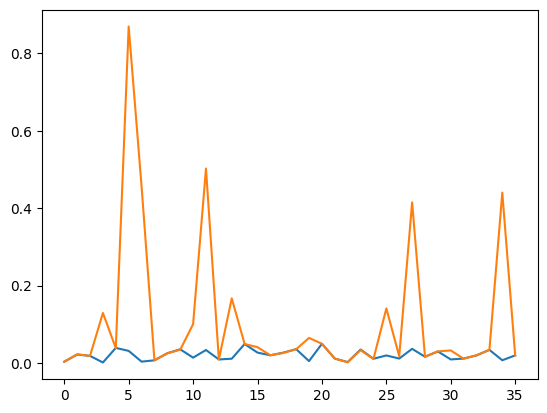

In [76]:
import matplotlib.pyplot as plt
plt.plot((np.abs(result_dict["information_flow_std"].flatten()-bootstrap_result["bootstrap_information_flow_std"].flatten()))/bootstrap_result["bootstrap_information_flow_std"].flatten())
plt.plot((np.abs(result_dict["information_flow_std_origin"].flatten()-bootstrap_result["bootstrap_information_flow_std"].flatten()))/bootstrap_result["bootstrap_information_flow_std"].flatten())
plt.show()

box plot

In [77]:
len(bootstrap_result["bootstrap_information_flow_list"])

1000

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 bootstrap_result["information_flow_list"] 是一个包含5000个N x N矩阵的列表
bootstrap_samples = bootstrap_result["bootstrap_information_flow_list"]

# 理论矩阵
theoretical_std = result_dict["information_flow_std"]  # N x N 矩阵
theoretical_std_origin = result_dict["information_flow_std_origin"]  # N x N 矩阵
theoretical_mean = result_dict["information_flow"]  # N x N 矩阵

# 获取N的大小
N = theoretical_mean.shape[0]

# 用于存储每个位置的样本值和理论值
sample_values = []
theoretical_values = {'mean': {}, 'std': {}, 'std_origin': {}}
positions = []  # 存储每个位置的 [i, j]

# 遍历所有的样本矩阵
for sample in bootstrap_samples:
    for i in range(N):
        for j in range(N):
            sample_values.append(sample[i, j])  # 取出样本矩阵中的每个元素
            positions.append(N*i+j+1)
            theoretical_values['mean'][N*i+j+1] = theoretical_mean[i, j]
            theoretical_values['std'][N*i+j+1] = theoretical_std[i, j]

# 创建一个DataFrame来便于绘图
import pandas as pd

df = pd.DataFrame({
    'Position': positions, 
    'Value': sample_values,
    'Type': ['Sample Mean'] * len(sample_values)
})


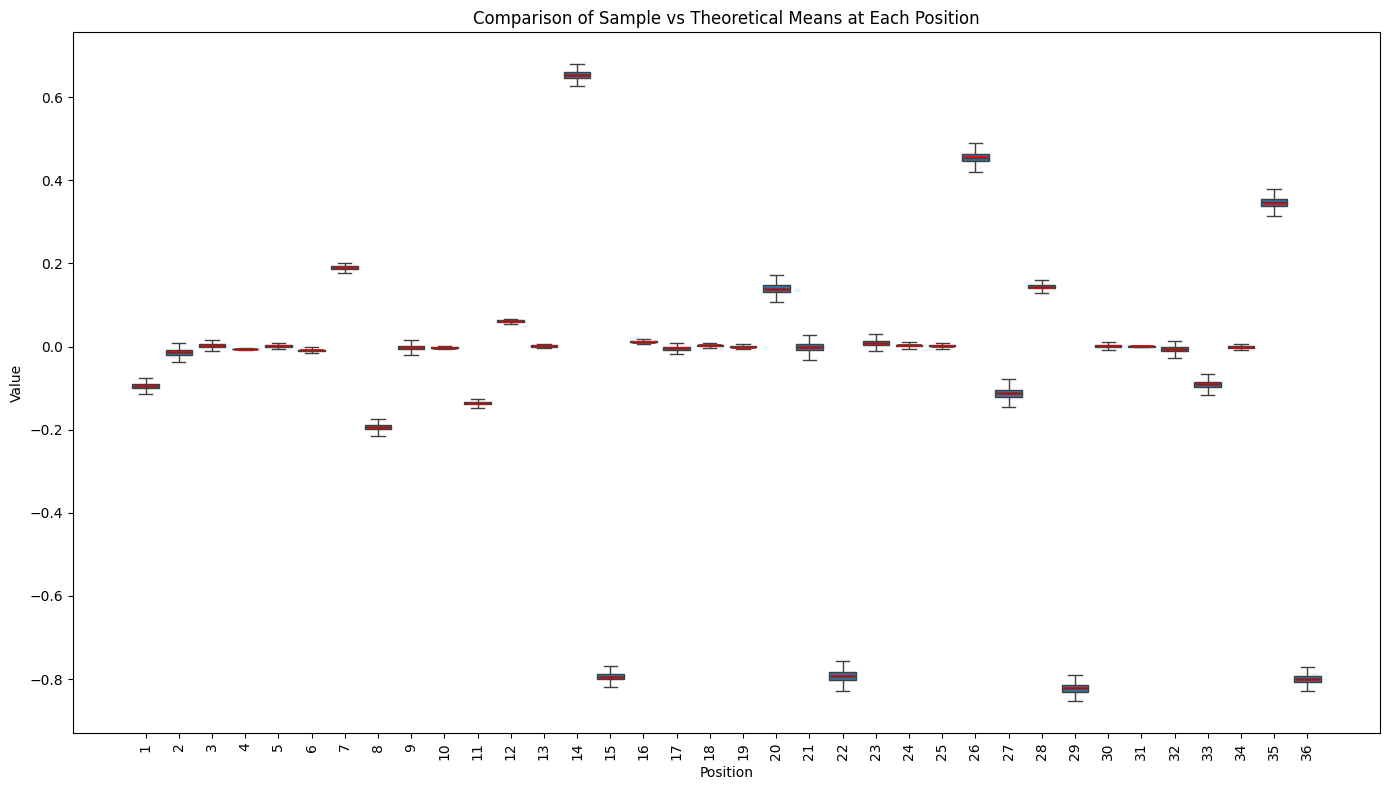

In [79]:
line_length = 0.35 
plt.figure(figsize=(14, 8))
sns.boxplot(x='Position', y='Value',  data=df, showfliers=False)
for position, mean_value in theoretical_values["mean"].items():
    plt.hlines(y=mean_value, xmin=position - line_length -1, xmax=position + line_length-1, colors='red', linewidth=2)  # 水平短横线
plt.title("Comparison of Sample vs Theoretical Means at Each Position")
plt.xticks(rotation=90)  # 使横坐标标签可读
plt.xlabel("Position")
plt.ylabel("Value")

# 显示图像
plt.tight_layout()
plt.show()

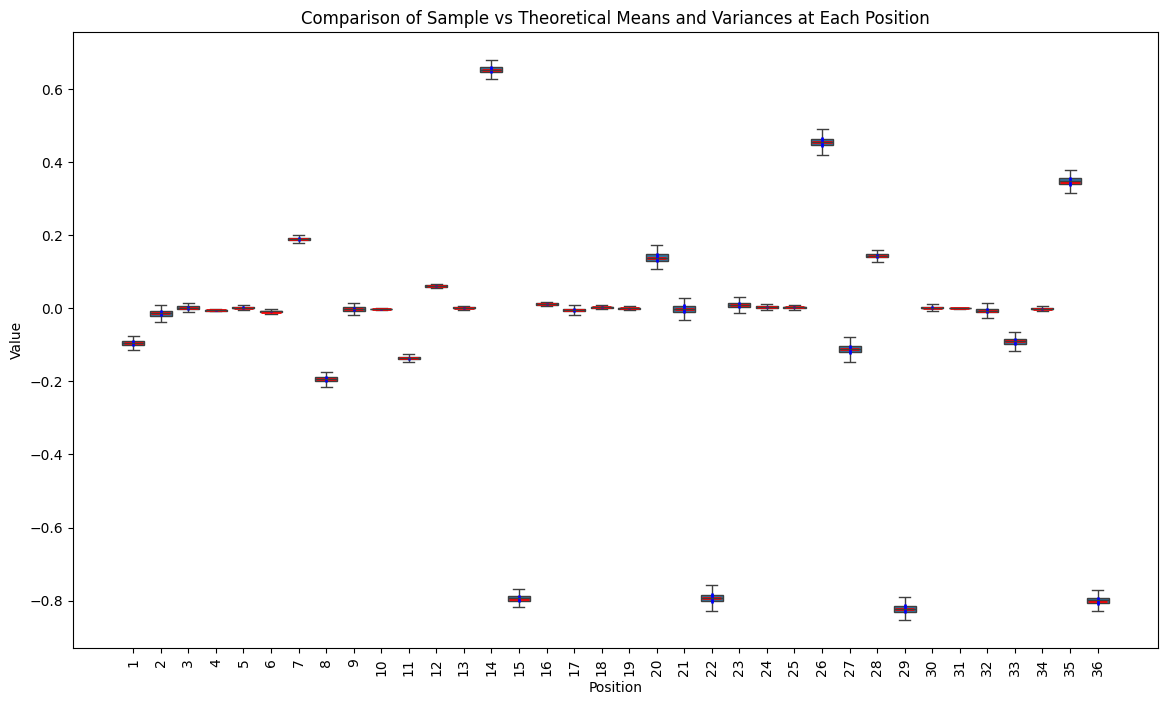

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

line_length = 0.35  
plt.figure(figsize=(14, 8))

# 画箱线图
sns.boxplot(x='Position', y='Value', data=df, showfliers=False)

# 遍历理论均值和方差
for position, mean_value in theoretical_values["mean"].items():
        std_value = theoretical_values["std"].get(position, 0)  # 获取标准差（如果不存在则默认为0）
        
        # 水平短横线表示均值
        plt.hlines(y=mean_value, xmin=position - line_length - 1, xmax=position + line_length - 1, colors='red', linewidth=2)
        # plt.fill_between(positions - 1, mean_value - std_value, mean_value + std_value, color='blue', alpha=0.2, label="Theoretical Variance")

        # # 垂直线表示均值 ± 标准差
        plt.vlines(x=position - 1, ymin=mean_value - std_value, ymax=mean_value + std_value, colors='blue', linewidth=2)

plt.title("Comparison of Sample vs Theoretical Means and Variances at Each Position")
plt.xticks(rotation=90)
plt.xlabel("Position")
plt.ylabel("Value")
plt.show()


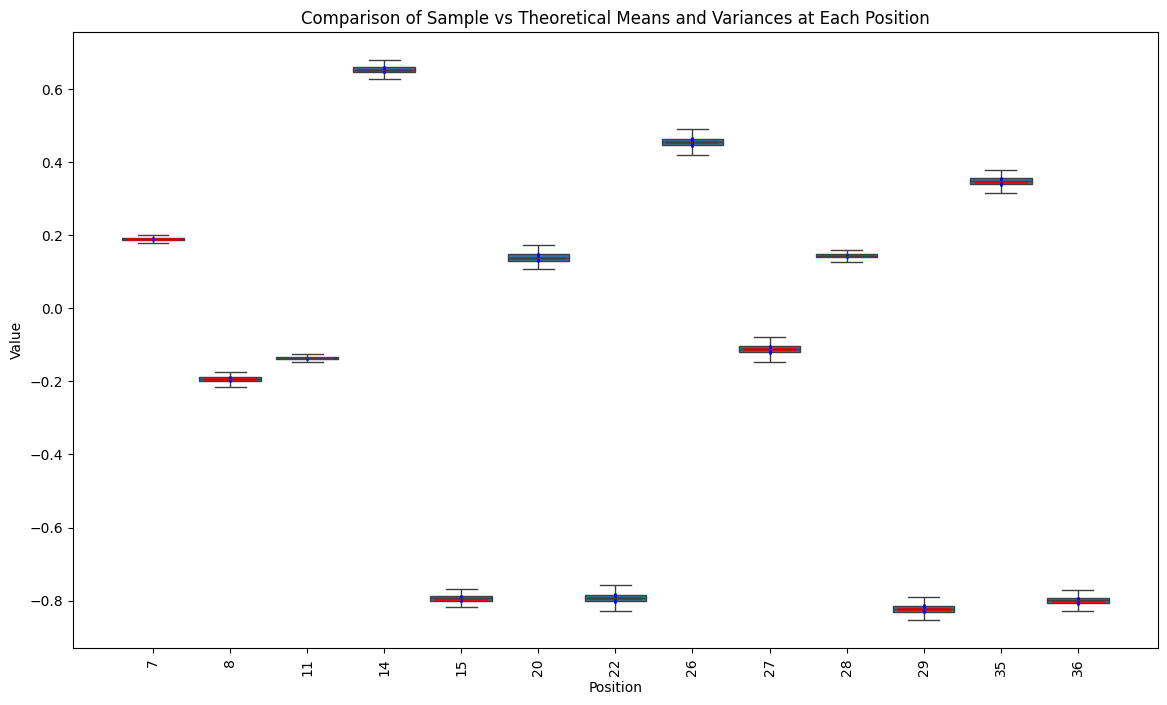

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

line_length = 0.35  
plt.figure(figsize=(14, 8))

# 先筛选符合 |mean_value| > 0.1 的 Position
valid_positions = {pos for pos, mean in theoretical_values["mean"].items() if np.abs(mean) > 0.1}

# 过滤 df
df_filtered = df[df["Position"].isin(valid_positions)]

# 画箱线图
ax = sns.boxplot(x='Position', y='Value', data=df_filtered, showfliers=False)

# 获取 Seaborn 处理后的 x 轴坐标
positions_map = {int(pos.get_text()): i for i, pos in enumerate(ax.get_xticklabels())}

# 遍历理论均值和方差
for position in valid_positions:
    if position not in positions_map:
        continue

    x_pos = positions_map[position]  # 获取类别映射的数值索引
    mean_value = theoretical_values["mean"][position]
    std_value = theoretical_values["std"].get(position, 0)

    # 水平短横线表示均值
    plt.hlines(y=mean_value, xmin=x_pos - line_length, xmax=x_pos + line_length, colors='red', linewidth=2)

    # 垂直线表示均值 ± 标准差
    plt.vlines(x=x_pos, ymin=mean_value - std_value, ymax=mean_value + std_value, colors='blue', linewidth=2)

plt.title("Comparison of Sample vs Theoretical Means and Variances at Each Position")
plt.xticks(rotation=90)
plt.xlabel("Position")
plt.ylabel("Value")
plt.show()


subspace

In [90]:
segments = [(0,2),(2,4),(4,6)]
lkif = LinearLKInformationFlow(np,1)
lkif.causality_estimate(XX[:,-5000:].T, lag_list=[1], segments=segments)
result_dict = lkif.get_dict()

In [91]:
bootstrap_result = lkif.bootstrap_estimate(XX[:,-5000:].T, lag_list=[1], segments=segments, bootstrap_num=1000, output_all=True)

Bootstrap Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Unbiased estimate

In [92]:
bootstrap_result["bootstrap_information_flow_mean"]

array([[-2.88919624e-01, -6.36043291e-04, -3.03053487e-02],
       [ 6.55224272e-01, -1.58836851e+00,  2.24953809e-03],
       [ 4.43892618e-01,  4.85652957e-03, -1.62221040e+00]])

In [93]:
result_dict["information_flow"]

array([[-2.89000591e-01, -4.30188764e-04, -3.06100717e-02],
       [ 6.55375193e-01, -1.58765112e+00,  2.11526621e-03],
       [ 4.44067052e-01,  4.84164397e-03, -1.62189981e+00]])

Variance comparison

In [94]:
bootstrap_result["bootstrap_information_flow_std"]

array([[0.01159728, 0.00801985, 0.00698425],
       [0.00924271, 0.01702584, 0.00534577],
       [0.01247316, 0.01317831, 0.01603697]])

In [95]:
result_dict["information_flow_std_origin"]

array([[0.01111914, 0.00779966, 0.00473899],
       [0.00760492, 0.0168962 , 0.00531614],
       [0.01042438, 0.01196283, 0.01582826]])

In [96]:
result_dict["information_flow_std"]

array([[0.01111914, 0.0078208 , 0.00697653],
       [0.00938919, 0.0168962 , 0.00532572],
       [0.0127745 , 0.01305228, 0.01582826]])

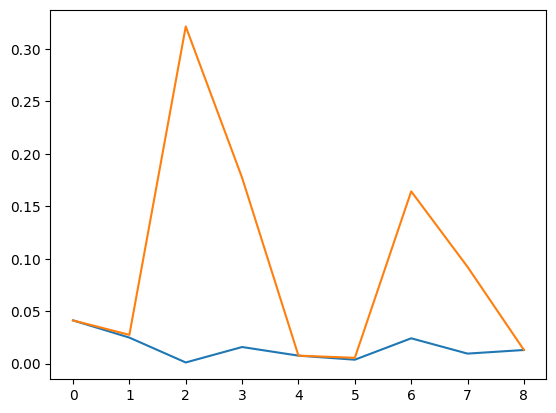

In [97]:
import matplotlib.pyplot as plt
plt.plot((np.abs(result_dict["information_flow_std"].flatten()-bootstrap_result["bootstrap_information_flow_std"].flatten()))/bootstrap_result["bootstrap_information_flow_std"].flatten())
plt.plot((np.abs(result_dict["information_flow_std_origin"].flatten()-bootstrap_result["bootstrap_information_flow_std"].flatten()))/bootstrap_result["bootstrap_information_flow_std"].flatten())
plt.show()

box plot

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 bootstrap_result["information_flow_list"] 是一个包含5000个N x N矩阵的列表
bootstrap_samples = bootstrap_result["bootstrap_information_flow_list"]

# 理论矩阵
theoretical_std = result_dict["information_flow_std"]  # N x N 矩阵
theoretical_std_origin = result_dict["information_flow_std_origin"]  # N x N 矩阵
theoretical_mean = result_dict["information_flow"]  # N x N 矩阵

# 获取N的大小
N = theoretical_mean.shape[0]

# 用于存储每个位置的样本值和理论值
sample_values = []
theoretical_values = {'mean': {}, 'std': {}, 'std_origin': {}}
positions = []  # 存储每个位置的 [i, j]

# 遍历所有的样本矩阵
for sample in bootstrap_samples:
    for i in range(N):
        for j in range(N):
            sample_values.append(sample[i, j])  # 取出样本矩阵中的每个元素
            positions.append(N*i+j+1)
            theoretical_values['mean'][N*i+j+1] = theoretical_mean[i, j]
            theoretical_values['std'][N*i+j+1] = theoretical_std[i, j]

# 创建一个DataFrame来便于绘图
import pandas as pd

df = pd.DataFrame({
    'Position': positions, 
    'Value': sample_values,
    'Type': ['Sample Mean'] * len(sample_values)
})


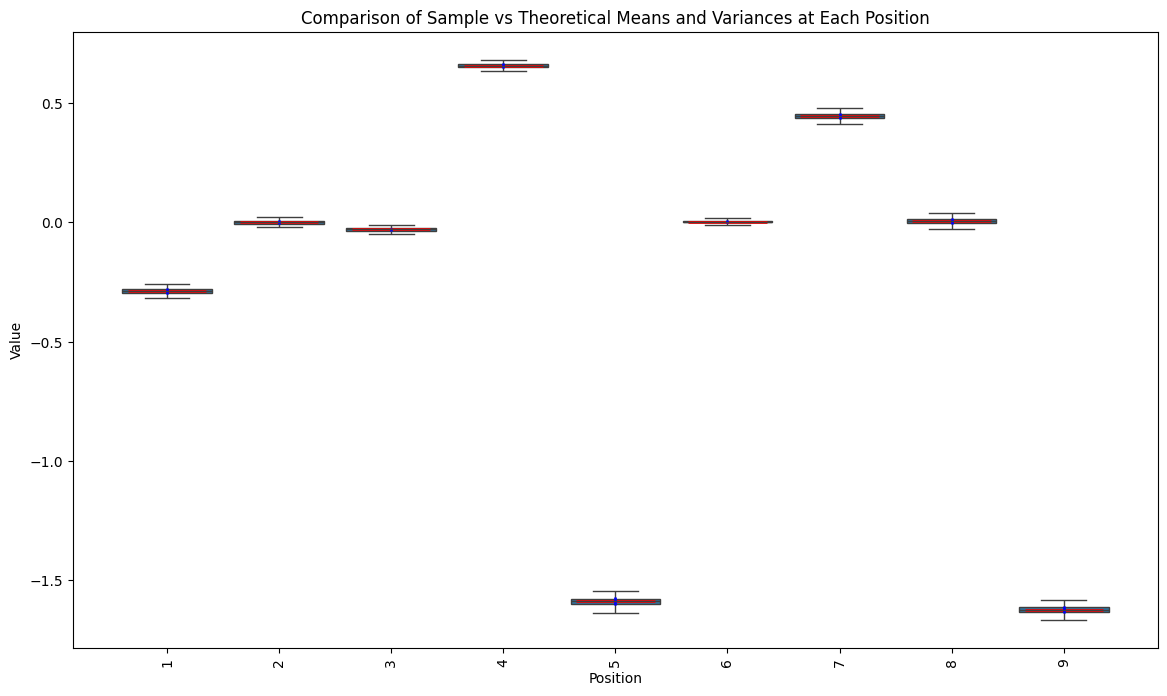

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

line_length = 0.35  
plt.figure(figsize=(14, 8))

# 画箱线图
sns.boxplot(x='Position', y='Value', data=df, showfliers=False)

# 遍历理论均值和方差
for position, mean_value in theoretical_values["mean"].items():
        std_value = theoretical_values["std"].get(position, 0)  # 获取标准差（如果不存在则默认为0）
        
        # 水平短横线表示均值
        plt.hlines(y=mean_value, xmin=position - line_length - 1, xmax=position + line_length - 1, colors='red', linewidth=2)
        # plt.fill_between(positions - 1, mean_value - std_value, mean_value + std_value, color='blue', alpha=0.2, label="Theoretical Variance")

        # # 垂直线表示均值 ± 标准差
        plt.vlines(x=position - 1, ymin=mean_value - std_value, ymax=mean_value + std_value, colors='blue', linewidth=2)

plt.title("Comparison of Sample vs Theoretical Means and Variances at Each Position")
plt.xticks(rotation=90)
plt.xlabel("Position")
plt.ylabel("Value")
plt.show()
